In [197]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

%matplotlib inline

In [87]:
masses = list(np.linspace(500,15000,20)) + [20000,50000,100000]
# [20000,50000,100000]

In [88]:
masses = list(np.array([   500.        ,   1263.15789474,   2026.31578947,   2789.47368421,
         3552.63157895,   4315.78947368,   5078.94736842,   
         6605.26315789,   7368.42105263,   8131.57894737,   8894.73684211,
         9657.89473684,  10421.05263158,  11184.21052632,  
        12710.52631579,  13473.68421053,  14236.84210526,  15000.        ])) + [20000,50000,100000]


In [89]:
masses = [100000]

In [61]:
dp_frac = []

good_graphs = []
bad_graphs = []

for mass in masses:
    with open ("/group/hepheno/smsharma/Dark-Showers/MG5_aMC_v2_5_6_patch_int_signal_sig_tchannel_"+str(mass) + "_0/bin/sig_tchannel/HTML/run_01/results.html", "r") as myfile:

        data=myfile.read()
        
    soup = BeautifulSoup(data) # Parse the HTML as a string
    
    for table in soup.find_all('table')[1:]:
    
        dp_sum = 0.
        rest_sum = 0.

        for row in table.find_all('tr'):
            column_marker = 0
            columns = row.find_all('td')

            for icolumn, column in enumerate(columns):
                graph_cxn = None
                if icolumn == 0:
                    graph_name = (column.get_text())
                if icolumn == 1:
                    graph_cxn = (column.get_text())
                if graph_cxn is not None:
                    if float(graph_cxn) > 1e-12: 
#                         print graph_name, graph_cxn
                        good_graphs.append(graph_name)
                    else:
                        bad_graphs.append(graph_name)

In [64]:
masses = list(np.array([   500.        ,   1263.15789474,   2026.31578947,   2789.47368421,
         3552.63157895,   4315.78947368,   5078.94736842,   
         7368.42105263,   8131.57894737,   8894.73684211,
         9657.89473684,  10421.05263158,  11184.21052632,  
        12710.52631579,  13473.68421053,  14236.84210526,  15000.        ])) + [20000,50000,100000]

In [65]:
dp_frac = []

for mass in masses:
    with open ("/group/hepheno/smsharma/Dark-Showers/MG5_aMC_v2_5_6_patch_int_signal_sig_tchannel_"+str(mass) + "_0/bin/sig_tchannel/HTML/run_01/results.html", "r") as myfile:
        data=myfile.read()
        
    soup = BeautifulSoup(data) # Parse the HTML as a string
    dp_sum = 0.
    rest_sum = 0.
    
    for table in soup.find_all('table')[1:]:
    


        for row in table.find_all('tr'):
            column_marker = 0
            columns = row.find_all('td')

            for icolumn, column in enumerate(columns):
                graph_cxn = None
                if icolumn == 0:
                    graph_name = (column.get_text())
                if icolumn == 1:
                    graph_cxn = (column.get_text())
                if graph_cxn is not None:
#                     print graph_name, graph_cxn
                    if graph_name in good_graphs:
                        dp_sum += float(graph_cxn)
                    else:
                        rest_sum += float(graph_cxn)
    print mass, dp_sum/(dp_sum+rest_sum)
#     print dp_sum,rest_sum


    dp_frac.append(dp_sum/(dp_sum+rest_sum))

500.0 0.788399179376
1263.15789474 0.944706412645
2026.31578947 0.983407784189
2789.47368421 0.993236993209
3552.63157895 0.996133683534
4315.78947368 0.997119686845
5078.94736842 0.997353633617
7368.42105263 0.997562452221
8131.57894737 0.997530734599
8894.73684211 0.997515504128
9657.89473684 0.997568571547
10421.0526316 0.997531912237
11184.2105263 0.997536245523
12710.5263158 0.997741341129
13473.6842105 0.997734888142
14236.8421053 0.997775504496
15000.0 0.997736825017
20000 0.997780850594
50000 0.997807836649
100000 0.997802602352


In [68]:
fs_labels = 26
fs_ticks = 25
fs_text = 23
fs_legend = 22

/group/hepheno/heptools/anaconda3/envs/venv_py27/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


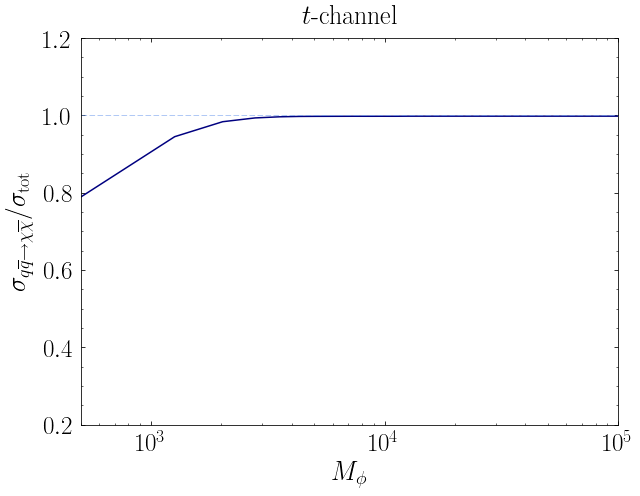

In [69]:
fig=plt.figure(figsize=(9,7))
plot_colorsss=['cornflowerblue','mediumseagreen', 'firebrick','indigo','violet','maroon','darkgrey','lightpink','black','forestgreen','cornflowerblue', 'salmon','violet','goldenrod','maroon','darkgrey','lightpink']

lw = 2.5


plt.plot(masses, np.array(dp_frac)*1, color = 'navy')
plt.xscale("log")
plt.xlabel("$M_\phi$",fontsize=fs_labels)
plt.ylabel("$\sigma_{q \overline q\\rightarrow \chi\overline\chi}/\sigma_\mathrm{tot}$",fontsize=fs_labels)
plt.ylim(0.2,1.2)
plt.xlim(min(masses), max(masses))

leg = plt.legend(bbox_to_anchor=(0, 0, 0.97, 0.95),
           fontsize=22, ncol=1,frameon=False,
           handletextpad=.5,
           borderaxespad=0.,title="$M_\phi$")
plt.tick_params(axis='both', which='major', labelsize=fs_ticks)

title = "$t$-channel"
plt.title(title, fontsize=fs_labels)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.02])
plt.tight_layout()

plt.axhline(1.,ls='--',lw=0.5)

# plt.savefig("CxnDPvsRest.pdf")

In [198]:
masses = [100000]

In [199]:
dp_frac = []

good_graphs = []
bad_graphs = []

for mass in masses:
    with open ("/group/hepheno/smsharma/Dark-Showers/MG5_aMC_v2_5_6_patch_int_signal/bin/sig_tchannel_lambda0p3//Events/html_lambda0p3_"+str(mass) + "_0.html", "r") as myfile:
        data=myfile.read()
        
    soup = BeautifulSoup(data) # Parse the HTML as a string
    
    for table in soup.find_all('table')[1:]:
    
        dp_sum = 0.
        rest_sum = 0.

        for row in table.find_all('tr'):
            column_marker = 0
            columns = row.find_all('td')

            for icolumn, column in enumerate(columns):
                graph_cxn = None
                if icolumn == 0:
                    graph_name = (column.get_text())
                if icolumn == 1:
                    graph_cxn = (column.get_text())
                if graph_cxn is not None:
#                     print graph_name, graph_cxn
                    if float(graph_cxn) > 1e-17: 
                        
                        good_graphs.append(graph_name)
                    else:
                        bad_graphs.append(graph_name)

In [200]:
masses = [100] + list(np.arange(300,2000, 100))+  list(np.arange(2000,7000, 500))

In [210]:
dp_frac = []
dp_sum_ary = []

for mass in masses:
    with open ("/group/hepheno/smsharma/Dark-Showers/MG5_aMC_v2_5_6_patch_int_signal/bin/sig_tchannel_lambda0p3//Events/html_lambda0p3_"+str(mass) + "_0.lhe", "r") as myfile:
        data=myfile.read()
        
    soup = BeautifulSoup(data) # Parse the HTML as a string
    dp_sum = 0.
    rest_sum = 0.
    
    for table in soup.find_all('table')[1:]:
    


        for row in table.find_all('tr'):
            column_marker = 0
            columns = row.find_all('td')

            for icolumn, column in enumerate(columns):
                graph_cxn = None
                if icolumn == 0:
                    graph_name = (column.get_text())
                if icolumn == 1:
                    graph_cxn = (column.get_text())
                if graph_cxn is not None:
#                     print graph_name, graph_cxn
                    if graph_name in good_graphs:
                        dp_sum += float(graph_cxn)
                    else:
                        rest_sum += float(graph_cxn)
#                     print float(graph_cxn)
    print mass, dp_sum/(dp_sum+rest_sum)
#     print dp_sum,rest_sum

    dp_sum_ary.append(dp_sum)
    dp_frac.append(dp_sum/(dp_sum+rest_sum))

100 0.481817422089
300 0.601214295491
400 0.623974070499
500 0.649753352335
600 0.67660141285
700 0.702876818491
800 0.729471506023
900 0.755796363593
1000 0.783212168215
1100 0.807979065805
1200 0.833507803667
1300 0.856408637999
1400 0.881362340573
1500 0.897451668577
1600 0.915594306995
1700 0.928742980017
1800 0.940974836956
1900 0.950315164889
2000 0.957447758594
2500 0.981179037352
3000 0.990449116762
3500 0.995685712703
4000 0.997828107608
4500 0.998897495865
5000 0.999305290423
5500 0.999492057482
6000 0.999568980155
6500 0.99960072172


In [202]:
np.save("dp_sum_ary.npy", dp_sum_ary)

In [203]:
masses = [100000]

In [204]:

good_graphs = []
bad_graphs = []

for mass in masses:
    with open ("/group/hepheno/smsharma/Dark-Showers/MG5_aMC_v2_5_6_patch_int_signal/bin/sig_tchannel_lambda1//Events/html_lambda0p3_"+str(mass) + "_0.html", "r") as myfile:
        data=myfile.read()
        
    soup = BeautifulSoup(data) # Parse the HTML as a string
    
    for table in soup.find_all('table')[1:]:
    
        dp_sum = 0.
        rest_sum = 0.

        for row in table.find_all('tr'):
            column_marker = 0
            columns = row.find_all('td')

            for icolumn, column in enumerate(columns):
                graph_cxn = None
                if icolumn == 0:
                    graph_name = (column.get_text())
                if icolumn == 1:
                    graph_cxn = (column.get_text())
                if graph_cxn is not None:
#                     print graph_name, graph_cxn
                    if float(graph_cxn) > 1e-16: 
                        
                        good_graphs.append(graph_name)
                    else:
                        bad_graphs.append(graph_name)

In [205]:
masses = [100] + list(np.arange(300,2000, 100))+  list(np.arange(2000,7000, 500))

In [206]:
dp_frac_lambda1 = []
dp_sum_ary_lambda1 = []

for mass in masses:
    with open ("/group/hepheno/smsharma/Dark-Showers/MG5_aMC_v2_5_6_patch_int_signal/bin/sig_tchannel_lambda1//Events/html_lambda0p3_"+str(mass) + "_0.html", "r") as myfile:
        data=myfile.read()
        
    soup = BeautifulSoup(data) # Parse the HTML as a string
    dp_sum_lambda1 = 0.
    rest_sum_lambda1 = 0.
    
    for table in soup.find_all('table')[1:]:
    


        for row in table.find_all('tr'):
            column_marker = 0
            columns = row.find_all('td')

            for icolumn, column in enumerate(columns):
                graph_cxn = None
                if icolumn == 0:
                    graph_name = (column.get_text())
                if icolumn == 1:
                    graph_cxn = (column.get_text())
                if graph_cxn is not None:
#                     print graph_name, graph_cxn
                    if graph_name in good_graphs:
                        dp_sum_lambda1 += float(graph_cxn)
                    else:
                        rest_sum_lambda1 += float(graph_cxn)
#                     print float(graph_cxn)
    print mass, dp_sum_lambda1/(dp_sum_lambda1+rest_sum_lambda1)
#     print dp_sum,rest_sum

    dp_sum_ary_lambda1.append(dp_sum_lambda1)
    dp_frac_lambda1.append(dp_sum_lambda1/(dp_sum_lambda1+rest_sum_lambda1))

100 0.702942955665
300 0.772851749462
400 0.809291815112
500 0.841258947435
600 0.869055388437
700 0.891132382958
800 0.912591928775
900 0.929385930746
1000 0.941552556682
1100 0.953014966492
1200 0.961787773732
1300 0.970037283367
1400 0.976183520634
1500 0.980809001585
1600 0.984293094126
1700 0.987234594116
1800 0.989555424526
1900 0.991586770936
2000 0.993010618777
2500 0.997095544744
3000 0.998502056608
3500 0.999136077699
4000 0.999382361002
4500 0.999482178014
5000 0.999565482972
5500 0.999601667072
6000 0.999592869322
6500 0.999600950805


In [207]:
np.save("dp_sum_ary_lambda1.npy", dp_sum_ary_lambda1)

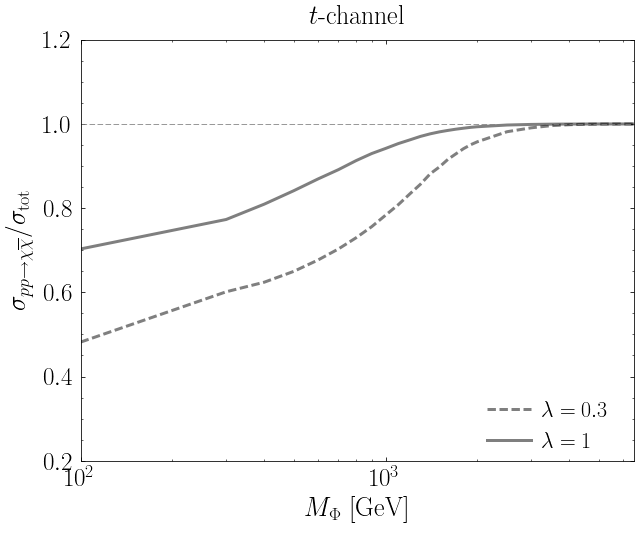

In [215]:
fig=plt.figure(figsize=(9,7.5))
plot_colorsss=['cornflowerblue','mediumseagreen', 'firebrick','indigo','violet','maroon','darkgrey','lightpink','black','forestgreen','cornflowerblue', 'salmon','violet','goldenrod','maroon','darkgrey','lightpink']

lw = 2.5


plt.plot(masses, np.array(dp_frac)*1, color = 'k', label = "$\lambda = 0.3$",lw=3, alpha=0.5, ls='--')
plt.plot(masses, np.array(dp_frac_lambda1)*1, color = 'k', label = "$\lambda = 1$",lw=3, alpha=0.5)


plt.xscale("log")
plt.xlabel("$M_\Phi$ [GeV]",fontsize=fs_labels)
plt.ylabel("$\sigma_{pp\\rightarrow \chi\overline\chi}/\sigma_\mathrm{tot}$",fontsize=fs_labels)
plt.ylim(0.2,1.2)
plt.xlim(min(masses), max(masses))

leg = plt.legend(bbox_to_anchor=(0, 0, 0.97, 0.95),
           fontsize=fs_legend, ncol=1,frameon=False,
           handletextpad=.5,
           borderaxespad=0., loc='lower right')
plt.tick_params(axis='both', which='major', labelsize=fs_ticks)

title = "$t$-channel"
plt.title(title, fontsize=fs_labels)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.02])
plt.tight_layout()

plt.tick_params(axis='both', which='major', labelsize=fs_ticks)

plt.axhline(1.,ls='--',lw=0.8, color='grey')

plt.savefig("tchannel_direct_vs_cxn.pdf")